# Credit EDA Case Study 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading data set for the current application

In [4]:
df_curr_app=pd.read_csv(r'C:\Users\swballa\Documents\Personal\Data_Analytics\Credit_EDA_Case_Study\Credit EDA Case Study\application_data.csv')

In [5]:
df_curr_app.shape

(307511, 122)

In [6]:
df_curr_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_curr_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

### Data cleaning for the current application

In [8]:
df_curr_app.isnull().sum().head(50)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [9]:
drop_cols=df_curr_app.isnull().sum()
drop_cols=drop_cols[drop_cols.values>(0.35*len(df_curr_app))] # checking columns having null values for more than 35%
len(drop_cols)

49

In [10]:
drop_cols= list(drop_cols[drop_cols.values>=0.35].index)
df_curr_app.drop(labels=drop_cols,axis=1,inplace=True)

In [11]:
df_curr_app.shape # checking whether the columns are dropped

(307511, 73)

In [12]:
df_curr_app.isnull().sum().tail(50)

FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
F

In [13]:
df_curr_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [14]:
df_curr_app.AMT_ANNUITY.median() # checking the median to impute the missing values

24903.0

In [15]:
df_curr_app['AMT_ANNUITY']=df_curr_app.AMT_ANNUITY.fillna(df_curr_app.AMT_ANNUITY.median()) 
#Imputing missing values with median

In [16]:
df_curr_app['AMT_ANNUITY'].describe() #Missing values are imputed

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [17]:
df_curr_app.FLAG_DOCUMENT_2.unique() #Dropping columns starting with 'FLAG_DOC*' as we do not need it for analysis

array([0, 1], dtype=int64)

In [18]:
# fetching all columns starting with 'FLAG_DOC*'
flag_cols=[x for x in df_curr_app if x.startswith('FLAG_DOC')] 
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [19]:
# dropping all columns starting with 'FLAG_DOC*'
df_curr_app.drop(labels=flag_cols,axis=1,inplace=True)

In [20]:
df_curr_app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [21]:
df_curr_app.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

In [22]:
df_curr_app.AMT_GOODS_PRICE.median()

450000.0

In [23]:
# Imputing missing values with median for AMT_GOODS_PRICE
df_curr_app['AMT_GOODS_PRICE']=df_curr_app.AMT_GOODS_PRICE.fillna(df_curr_app.AMT_GOODS_PRICE.median())

In [24]:
df_curr_app.AMT_GOODS_PRICE.isnull().sum()

0

In [25]:
df_curr_app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
df_curr_app.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [27]:
# Replacing the missing values for OCCUPATION_TYPE column with mode as it is a categorical variable
df_curr_app['OCCUPATION_TYPE']=df_curr_app.OCCUPATION_TYPE.fillna(df_curr_app.OCCUPATION_TYPE.mode()[0])

In [28]:
# Checking whether the nulls are replaced for OCCUPATION_TYPE
df_curr_app.OCCUPATION_TYPE.isnull().sum() 

0

In [29]:
df_curr_app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
C

In [30]:
#dropping social circle columns as the data description is not clear
df_curr_app.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [31]:
df_curr_app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
C

In [32]:
df_curr_app.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [33]:
df_curr_app.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [34]:
df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [35]:
df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

In [36]:
df_curr_app['AMT_REQ_CREDIT_BUREAU_HOUR']=df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_HOUR.median)
df_curr_app['AMT_REQ_CREDIT_BUREAU_DAY']=df_curr_app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_DAY.median)
df_curr_app['AMT_REQ_CREDIT_BUREAU_WEEK']=df_curr_app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_WEEK.median)
df_curr_app['AMT_REQ_CREDIT_BUREAU_MON']=df_curr_app.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_MON.median)
df_curr_app['AMT_REQ_CREDIT_BUREAU_YEAR']=df_curr_app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_YEAR.median)
df_curr_app['AMT_REQ_CREDIT_BUREAU_QRT']=df_curr_app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_curr_app.AMT_REQ_CREDIT_BUREAU_QRT.median)



In [37]:
df_curr_app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
C

In [38]:
# Checking counts of CODE_GENDER
df_curr_app.CODE_GENDER.value_counts() 
# We have 4 values for XNA which means not available. We can replace these values with mode for code_gender column.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
df_curr_app.CODE_GENDER=df_curr_app.CODE_GENDER.replace('XNA','F') #Replacing 'XNA' values for CODE_GENDER with mode i.e 'F'

In [40]:
df_curr_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [41]:
#Checking Columns starting with 'DAYS_' for any incorrect datatype or outliers or errors
print(df_curr_app.DAYS_EMPLOYED.unique())
print(df_curr_app.DAYS_BIRTH.unique())
print(df_curr_app.DAYS_REGISTRATION.unique())

[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [42]:
#We have negative values in these columns. Fetching columns starting with 'DAYS' into a new dataframe.
days_cols=[x for x in df_curr_app if x.startswith('DAYS')] 
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [43]:
#Converting the values in columns starting with 'DAYS' to absolute
df_curr_app[days_cols]= abs(df_curr_app[days_cols])

In [44]:
# Checking whether the values are converted to absolute for few columns starting with 'DAYS' 
print(df_curr_app.DAYS_EMPLOYED.unique())
print(df_curr_app.DAYS_BIRTH.unique())
print(df_curr_app.DAYS_REGISTRATION.unique())

[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]


In [45]:
# Days_birth column has the age of the client in days and the datatype is float
df_curr_app.DAYS_BIRTH.describe() 

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [46]:
# Converting the age to years and the datatype to int
df_curr_app.DAYS_BIRTH = ((df_curr_app.DAYS_BIRTH)/365).astype('int')

In [47]:
df_curr_app.DAYS_BIRTH.describe() 

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

#### We can see that the distribution of age among applicants is as follows :
#### Minimum age applicant is 20 years and max is 69 years.

#### Bucketing / Binning of certain variables as per analysis

In [114]:
#We can bin the DAYS_BIRTH column to get the different buckets of age that have applied for the loan.
df_curr_app['DAYS_BIRTH_BINS']=pd.cut(df_curr_app.DAYS_BIRTH, bins=[19,40,60,100], labels=['Young_Age','Middle_Age','Senior_Citizen'])

In [115]:
df_curr_app.DAYS_BIRTH_BINS.value_counts()

Middle_Age        142220
Young_Age         135923
Senior_Citizen     29368
Name: DAYS_BIRTH, dtype: int64

In [51]:
# checking statistics for AMT_INCOME_TOTAL column
df_curr_app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [121]:
# binning AMT_INCOME_TOTAL column based on quantiles
df_curr_app['AMT_INCOME_QRANGE'] = pd.qcut(df_curr_app.AMT_INCOME_TOTAL, q=[0,0.2,0.4,0.6,0.8,1], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

In [105]:
# binning AMT_INCOME_TOTAL column based on values
df_curr_app['AMT_INCOME_RANGE'] = pd.cut(df_curr_app.AMT_INCOME_TOTAL,bins=[0,50000,150000,300000,500000,1000000], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])
df_curr_app.AMT_INCOME_RANGE.value_counts()

LOW          150772
MEDIUM       129483
HIGH          20037
VERY LOW       4517
VERY HIGH      2452
Name: AMT_INCOME_TOTAL, dtype: int64

In [56]:
#Analysing the TARGET variable
df_curr_app.TARGET.value_counts() # 1 - Client with payment difficulties, 0 -- Client with no payment difficulties

0    282686
1     24825
Name: TARGET, dtype: int64

In [117]:
#Segmenting the data frame w.r.t to the target variable
df_target0 = df_curr_app.loc[df_curr_app.TARGET==0]
df_target1 = df_curr_app.loc[df_curr_app.TARGET==1]                        

In [159]:
#Checking the count of values in TARGET variable after segmenting
print(df_target0.shape)
print(df_target1.shape)

(282686, 51)
(24825, 51)


In [88]:
#Finding the imbalance ratio for the TARGET variable
round(len(df_target0)/len(df_target1),2)

11.39

#### The imbalance ratio is 11.39

### Univariate analysis for different variables

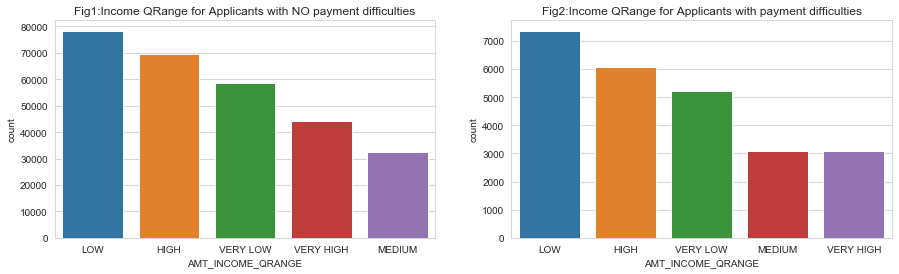

In [268]:
fig, ax =plt.subplots(1,2,figsize=[15,4])

sns.countplot(data=df_target0,x = 'AMT_INCOME_QRANGE',order = df_target0['AMT_INCOME_QRANGE'].value_counts().index,ax=ax[0])
sns.countplot(data=df_target1,x = 'AMT_INCOME_QRANGE',order = df_target1['AMT_INCOME_QRANGE'].value_counts().index,ax=ax[1])
ax[0].set_title('Fig1:Income QRange for Applicants with NO payment difficulties')
ax[1].set_title('Fig2:Income QRange for Applicants with payment difficulties')
plt.show()

#### Fig1:Income QRange for Applicants with NO payment difficulties :
1. Applicants with medium income range have the lowest count in terms of NO payment difficulties.
2. Applicants with low income range have the highest count in terms of NO payment difficulties.

#### Fig2:Income QRange for Applicants with payment difficulties:
1. Applicants with Very High Income range have the lowest count in terms of payment difficulties.
2. Applicants with low income range have the highest count in terms of payment difficulties.


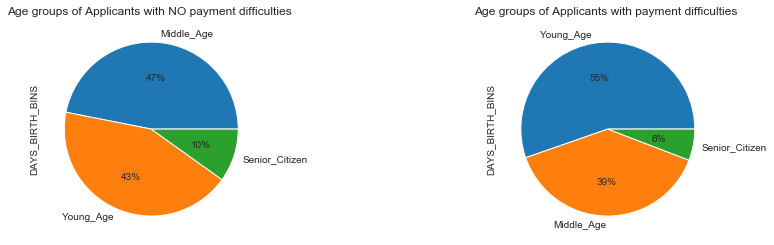

In [179]:
fig =plt.subplots(1,2,figsize=[15,4])
plt.subplot(1,2,1)
df_target0.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with NO payment difficulties ')
plt.subplot(1,2,2)
df_target1.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Age groups of Applicants with payment difficulties ')
plt.show()

1. The Middle_Age group has the maximum percentage of clients with NO payment difficulties followed by Young_Age and Senior_Citizen age groups.
2. The Young_Age group has the maximum percentage of clients with payment difficulties followed by Middle_Age and Senior_Citizen age groups.
3. By comparing the two graphs, we can infer that Middle_Age group has lower risk on payments as compared to Young_Age group.
4. Hence, there is a possibility that the Young_Age group will be having more payment difficulties.

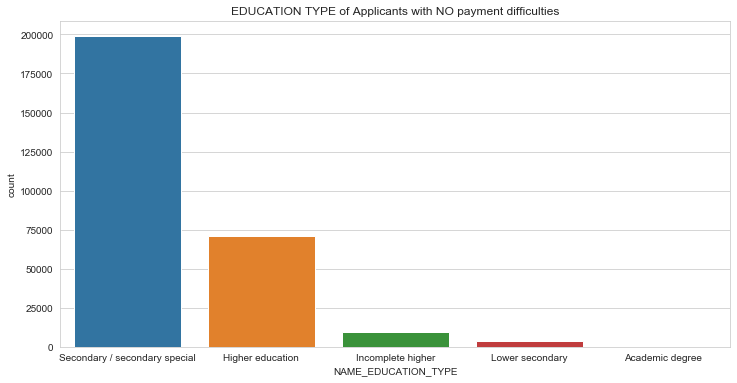

In [187]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_target0,x = 'NAME_EDUCATION_TYPE',order = df_target0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('EDUCATION TYPE of Applicants with NO payment difficulties')
plt.show()

1. We can infer that the Applicants with Secondary Education type have the highest applications with no payment difficulties.

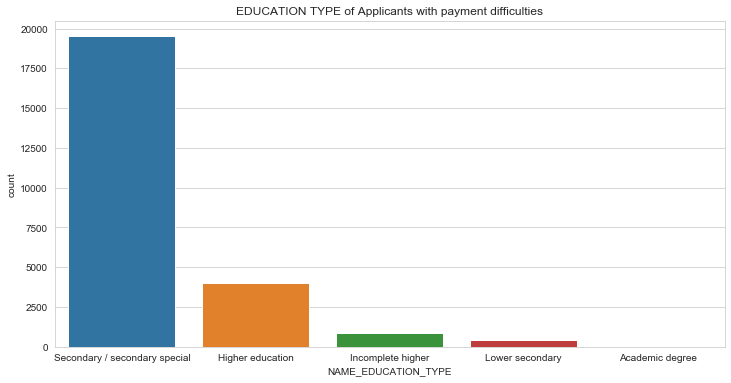

In [189]:
plt.figure(figsize=[12,6])
sns.countplot(data=df_target1,x = 'NAME_EDUCATION_TYPE',order = df_target1['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('EDUCATION TYPE of Applicants with payment difficulties')
plt.show()

1. We can infer that the Applicants with Secondary Education type have the highest applications with payment difficulties.
2. Both the above Education plots have a similar profile with respect to payment difficulties.
3. All education types have a lower count in payment difficulties as compared to no payment difficulties. 

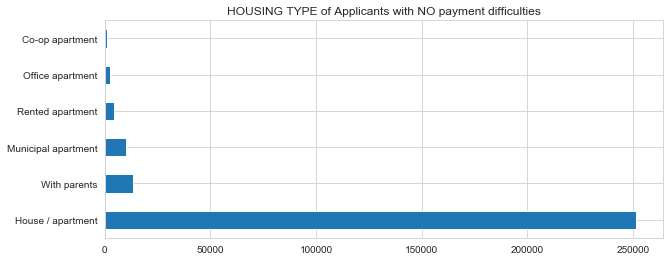

In [200]:
plt.figure(figsize=[10,4])
df_target0.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.title('HOUSING TYPE of Applicants with NO payment difficulties')
plt.show()

1. We can infer that maximum applicants own a HOUSE/apartment with NO payment difficulties.

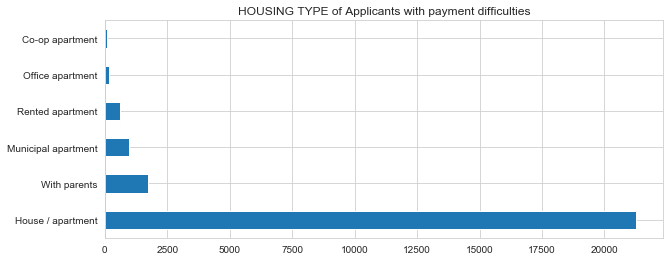

In [201]:
plt.figure(figsize=[10,4])
df_target1.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.title('HOUSING TYPE of Applicants with payment difficulties')
plt.show()

1. We can infer that maximum applicants own a HOUSE/apartment with payment difficulties.
2. Both the HOUSING TYPE plots have a similar profile with respect to payment difficulties but differ in count.

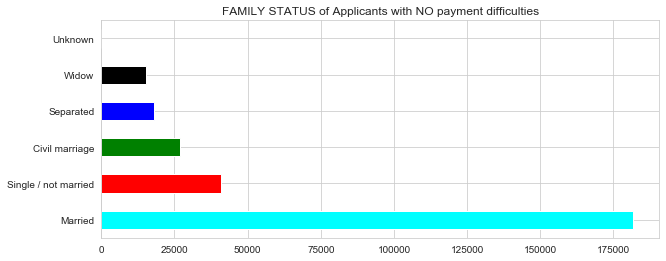

In [212]:
plt.figure(figsize=[10,4])
df_target0.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['cyan', 'red', 'green', 'blue', 'black'])
plt.title('FAMILY STATUS of Applicants with NO payment difficulties')
plt.show()

Married applicants have the highest count with NO payment difficulties.

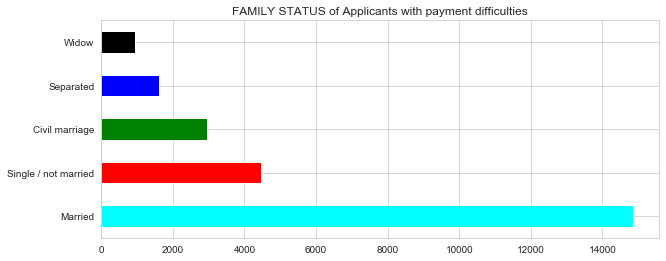

In [210]:
plt.figure(figsize=[10,4])
df_target1.NAME_FAMILY_STATUS.value_counts().plot.barh(color=['cyan', 'red', 'green', 'blue', 'black'])
plt.title('FAMILY STATUS of Applicants with payment difficulties')
plt.show()

1. Married applicants have the highest count with payment difficulties.
2. Both the FAMILY STATUS plots have a similar profile with respect to payment difficulties but differ in count.

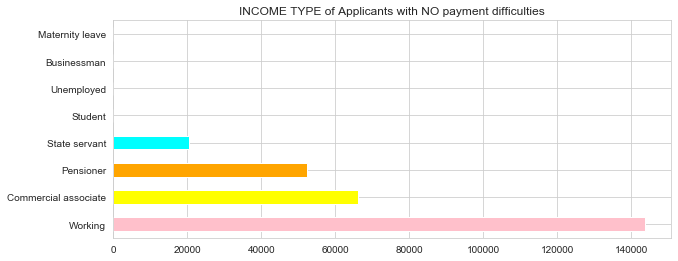

In [214]:
plt.figure(figsize=[10,4])
df_target0.NAME_INCOME_TYPE.value_counts().plot.barh(color=['pink','yellow','orange','cyan', 'red', 'green', 'blue', 'black'])
plt.title('INCOME TYPE of Applicants with NO payment difficulties')
plt.show()

1. There are 4 incomes types with no payment difficulties ( State servant, Pensioner, Commercial associate and Working) whereas the others are insignificant.
2. Among all, Working professionals have the highest count of applications with no payment difficulties.

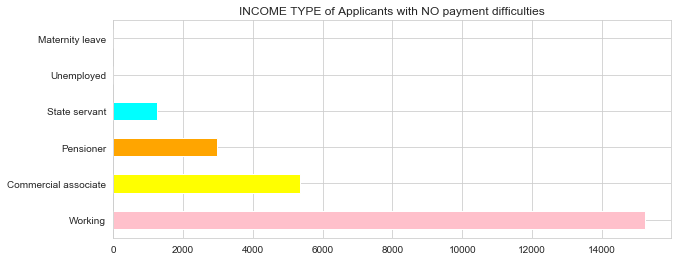

In [286]:
plt.figure(figsize=[10,4])
df_target1.NAME_INCOME_TYPE.value_counts().plot.barh(color=['pink','yellow','orange','cyan', 'red', 'green', 'blue', 'black'])
plt.title('INCOME TYPE of Applicants with NO payment difficulties')
plt.show()

1. Among all, Working professionals have the highest count of applications with payment difficulties whereas State servants have the lowest count of applications.

### Bivariate analysis for different variables

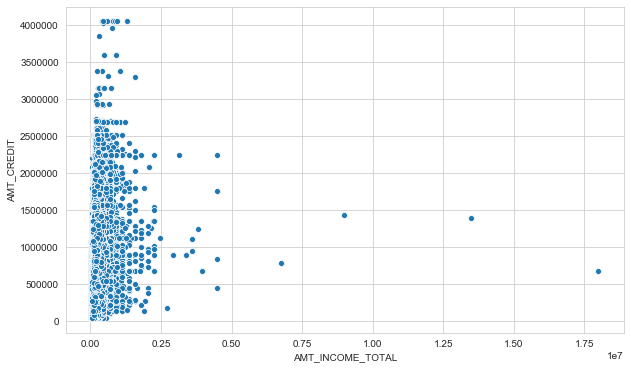

In [283]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df_target0, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT')
plt.show()

From the above scatter plot for  Target 0 we can infer that :
1. Maximum credit amount applications are for total income range between 0 to 25 lacs and Applicants with higher total income levels have lesser loan applications.
2. High Income totals do not amount to high credit amounts. 
3. Hence we can infer that total income range between 0 to 25 lacs have the most loan applications.


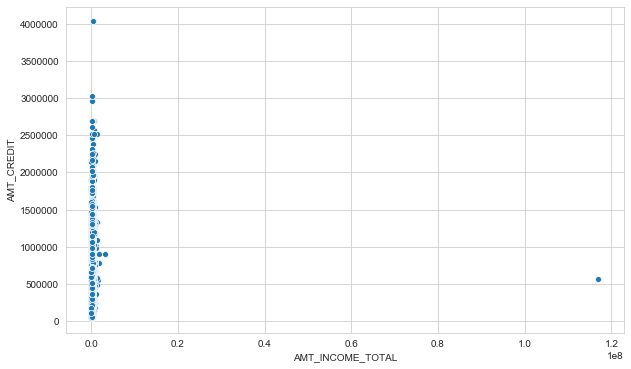

In [320]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=df_target1, x='AMT_INCOME_TOTAL', y = 'AMT_CREDIT')
plt.show()

From the above scatter plot for  Target 1 we can infer that :
1. Maximum loan applications are between the range of approx. 0-25 lakhs for income total. 
2. Amount credit for such loan applications ranges between 0-40 lakhs.
3. We can see 1 outlier for income total at 11.7 crores.

<Figure size 720x432 with 0 Axes>

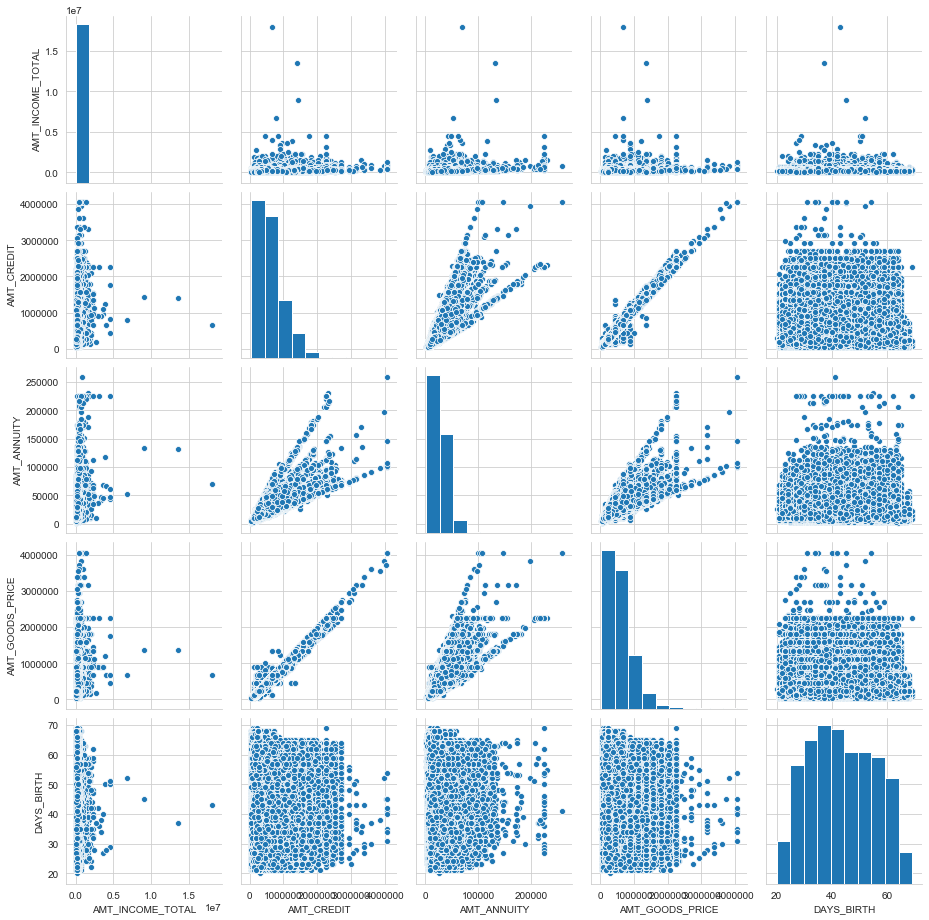

In [288]:
plt.figure(figsize=[10,6])
sns.pairplot(df_target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']])
plt.show()

#Inferences for target 0 in the pair plot for numerical variables :
1. We can see a high correlation between AMT_ANNUITY and AMT_GOODS_PRICE.
2. We can see a good correlation between AMT_ANNUITY and AMT_CREDIT.
3. We can see few outliers for DAYS_BIRTH and AMT_INCOME_TOTAL.
4. Also,we can see a high correlation between AMT_CREDIT and AMT_GOODS_PRICE.

<Figure size 720x432 with 0 Axes>

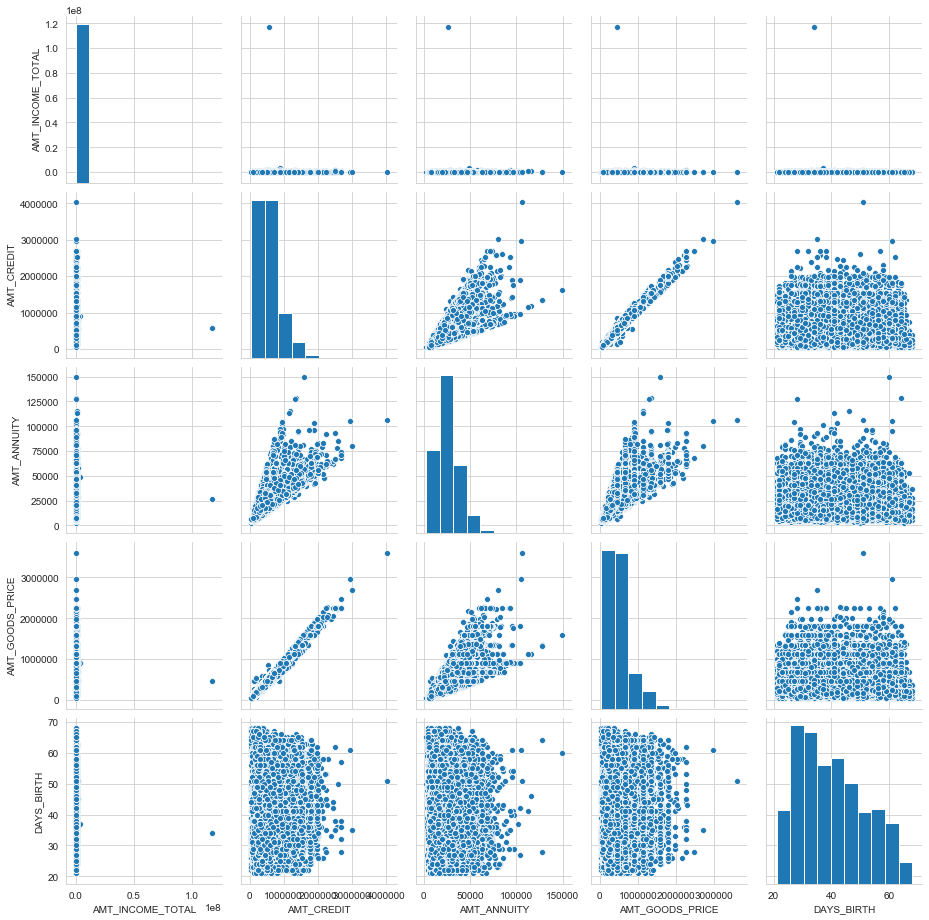

In [289]:
plt.figure(figsize=[10,6])
sns.pairplot(df_target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']])
plt.show()

#Inferences for target 1 in the pair plot for numerical variables :
1. We can see a good correlation between AMT_ANNUITY and AMT_GOODS_PRICE.
2. We can see a good correlation between AMT_ANNUITY and AMT_CREDIT.
3. We can see 1 outlier for DAYS_BIRTH and AMT_INCOME_TOTAL.
4. Also,we can see a high correlation between AMT_CREDIT and AMT_GOODS_PRICE.

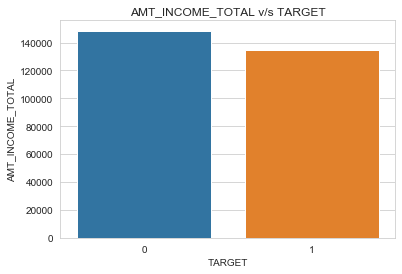

In [226]:
sns.barplot(data=df_curr_app,x='TARGET',y='AMT_INCOME_TOTAL', estimator = np.median)
plt.title('AMT_INCOME_TOTAL v/s TARGET')
plt.show()

From the above plot, we can infer that the applicants with NO payment difficulties have high income compared to applicants with payment difficulties. 

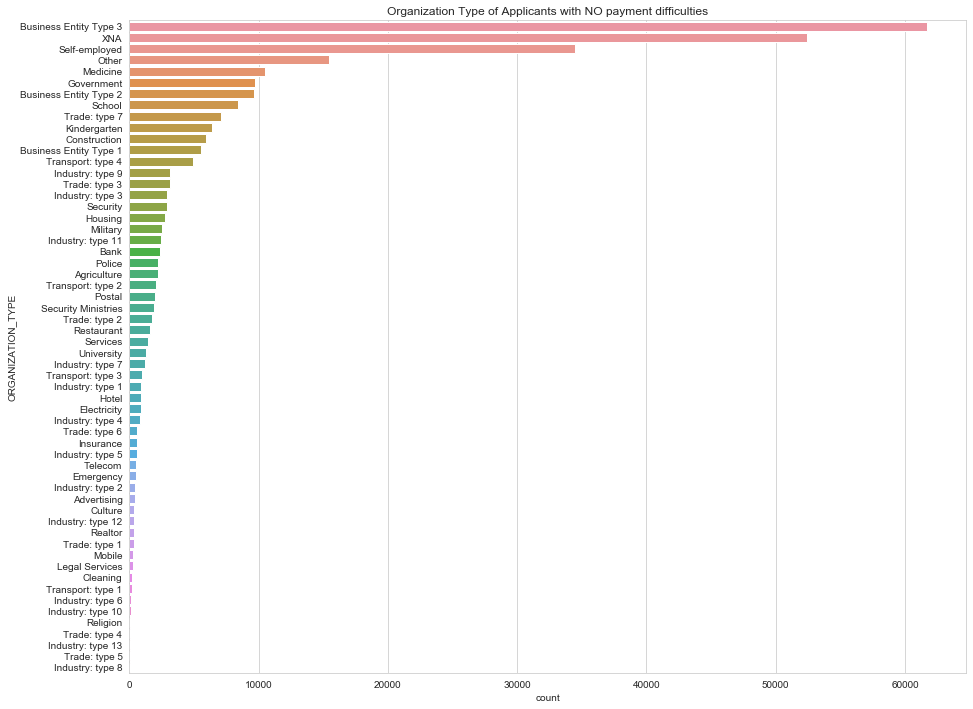

In [300]:
plt.figure(figsize=[15,12])
sns.countplot(data=df_target0, y = 'ORGANIZATION_TYPE', order=df_target0.ORGANIZATION_TYPE.value_counts().index)
plt.title('Organization Type of Applicants with NO payment difficulties')
plt.show()

Inferences :
1. Business Type Entity 3 has the highest amount of applicants with no payment difficulties.
2. Self-employed, Medicine and other organization types are few other groups having no payment difficulties.
3. 'XNA' undefined organization type has the second highest amount of applicants with no payment difficulties.

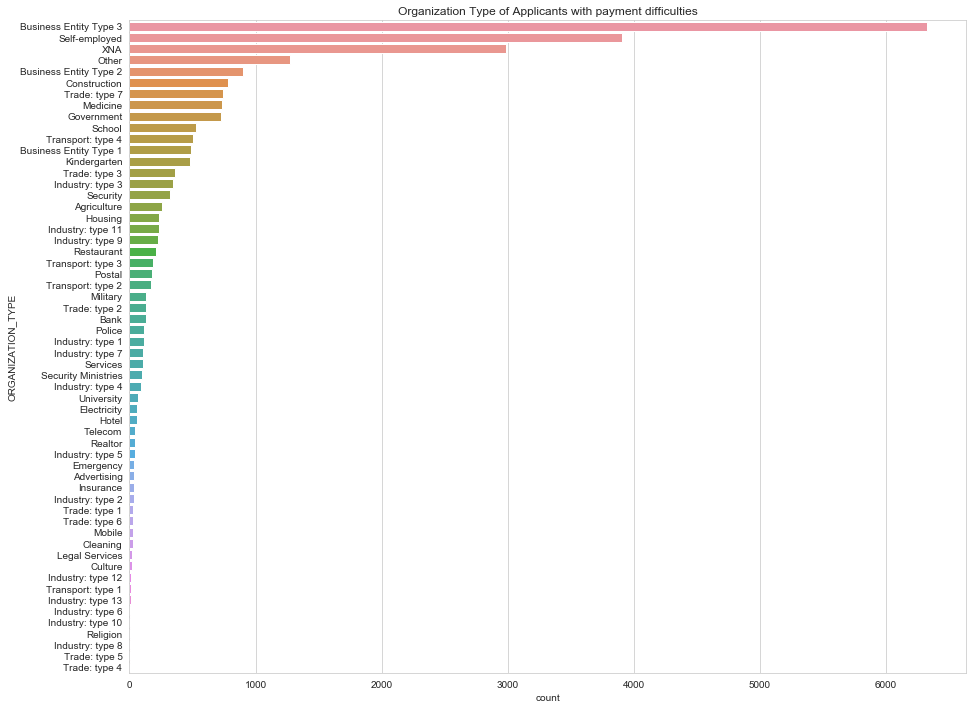

In [322]:
plt.figure(figsize=[15,12])
sns.countplot(data=df_target1, y = 'ORGANIZATION_TYPE', order=df_target1.ORGANIZATION_TYPE.value_counts().index)
plt.title('Organization Type of Applicants with payment difficulties')
plt.show()

Inferences :
1. Business Type Entity 3 has the highest amount of applicants with payment difficulties.
2. Business Type Entity 2, Construction and other organization types are few other groups having payment difficulties.
3. Self-employed type has the second highest amount of applicants with payment difficulties.
4. XNA undefined organization type has the third highest amount of applicants with payment difficulties as compared to applicants with no payment difficulties. 

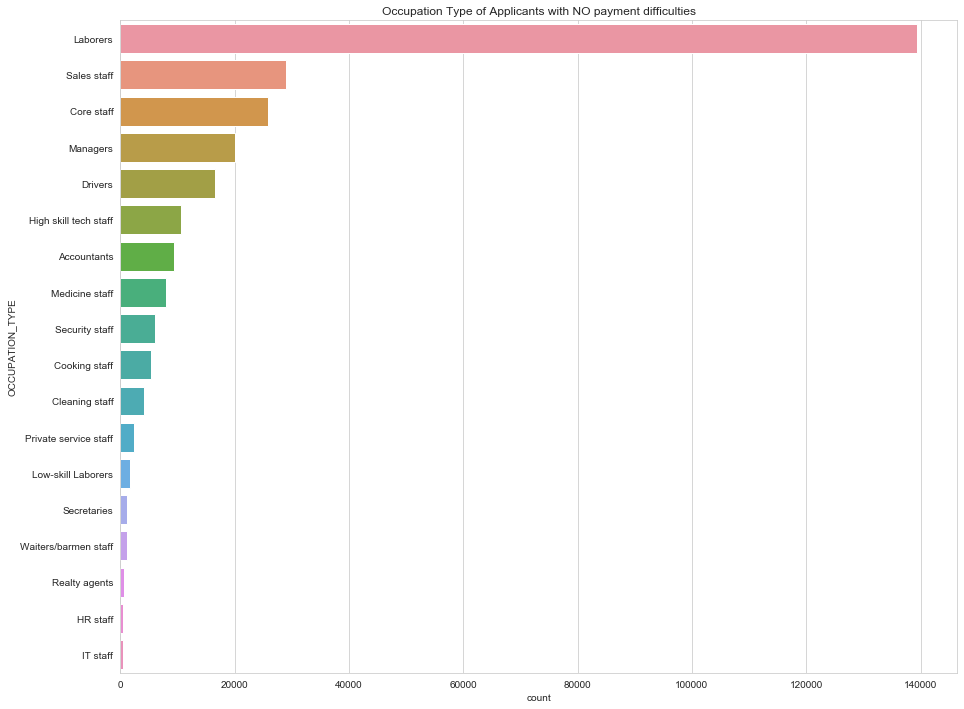

In [303]:
plt.figure(figsize=[15,12])
sns.countplot(data=df_target0, y = 'OCCUPATION_TYPE', order=df_target0.OCCUPATION_TYPE.value_counts().index)
plt.title('Occupation Type of Applicants with NO payment difficulties')
plt.show()

#Inferences:
1. Laborers have the highest amount of applications with no payment difficulties.
2. Sales staff has the second highest amount of applications with no payment difficulties.
3. HR and IT staff have the lowest amount of applications with no payment difficulties.

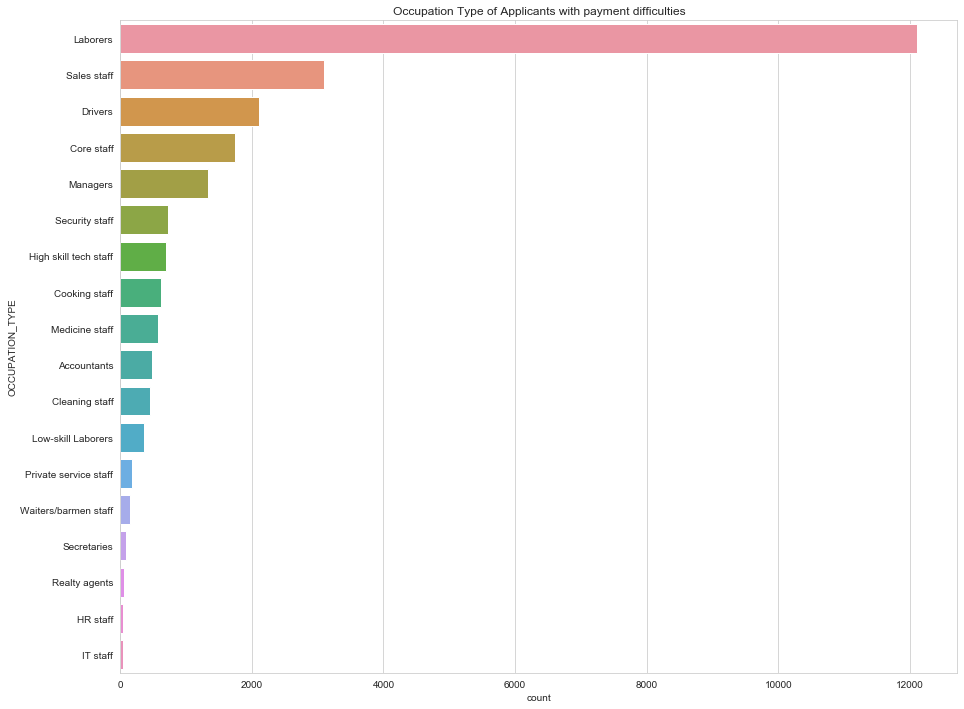

In [305]:
plt.figure(figsize=[15,12])
sns.countplot(data=df_target1, y = 'OCCUPATION_TYPE', order=df_target1.OCCUPATION_TYPE.value_counts().index)
plt.title('Occupation Type of Applicants with payment difficulties')
plt.show()

#Inferences:
1. Laborers have the highest amount of applications with payment difficulties.
2. Drivers have the third highest amount of applications with payment difficulties.

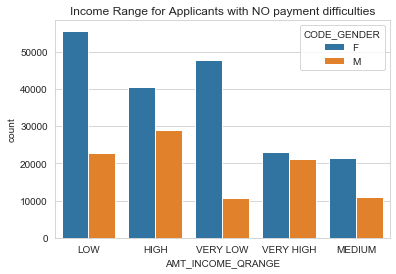

In [306]:
sns.countplot(data=df_target0, x = 'AMT_INCOME_QRANGE', order=df_target0.AMT_INCOME_QRANGE.value_counts().index,hue = 'CODE_GENDER')
plt.title('Income Range for Applicants with NO payment difficulties')
plt.show()

#### From the above graph for NO PAYMENT DIFFICULTIES we can visualize the split in income range basis gender and following are the observations:
1. In terms of counts LOW income range has the maximum aplications while Medium income group has the lowest applications.
2. Within Low, High and Very Low Income range it is evident that Female applicants are significantly more than male applicants.
3. For Very High Income range both Male and Female have a balanced ratio with Female applicants being slightly higher in count.

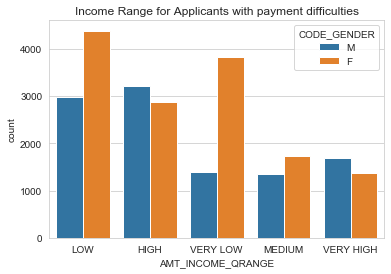

In [307]:
sns.countplot(data=df_target1, x = 'AMT_INCOME_QRANGE', order=df_target1.AMT_INCOME_QRANGE.value_counts().index,hue = 'CODE_GENDER')
plt.title('Income Range for Applicants with payment difficulties')
plt.show()

#### From the above graph for  PAYMENT DIFFICULTIES we can visualize the split in income range basis gender and following are the observations:
1. In terms of counts LOW income range has the maximum aplications while Very High income group has the lowest applications.
2. Within Low, Very Low Income range it is evident that Female applicants are significantly more than Male applicants.
3. For Very High Income range both Male and Female have a balanced ratio with Male applicants being slightly higher in count.

### Top 10 correlation for Target variable

In [156]:
# Finding the correlation matrix for numeric columns for Target=0 
target0_corr = df_target0[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(method='pearson')
target0_corr

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_ANNUITY,1.000000,0.771297,0.418948,0.776421,0.020909,0.075789,-0.012251,-0.104975,-0.039435,-0.014111
AMT_CREDIT,0.771297,1.000000,0.342799,0.987022,0.003081,0.064536,0.047366,-0.070104,-0.013477,0.001464
AMT_INCOME_TOTAL,0.418948,0.342799,1.000000,0.349426,0.027397,0.034256,-0.062494,-0.140392,-0.064937,-0.022896
AMT_GOODS_PRICE,0.776421,0.987022,0.349426,1.000000,-0.000559,0.062763,0.044637,-0.068527,-0.015891,0.003677
CNT_CHILDREN,0.020909,0.003081,0.027397,-0.000559,1.000000,0.878571,-0.336907,-0.245174,-0.185792,0.028751
CNT_FAM_MEMBERS,0.075789,0.064536,0.034256,0.062763,0.878571,1.000000,-0.285806,-0.238301,-0.175630,0.020460
DAYS_BIRTH,-0.012251,0.047366,-0.062494,0.044637,-0.336907,-0.285806,1.000000,0.626028,0.333025,0.270804
DAYS_EMPLOYED,-0.104975,-0.070104,-0.140392,-0.068527,-0.245174,-0.238301,0.626028,1.000000,0.214511,0.276663
DAYS_REGISTRATION,-0.039435,-0.013477,-0.064937,-0.015891,-0.185792,-0.175630,0.333025,0.214511,1.000000,0.100236
DAYS_ID_PUBLISH,-0.014111,0.001464,-0.022896,0.003677,0.028751,0.020460,0.270804,0.276663,0.100236,1.000000


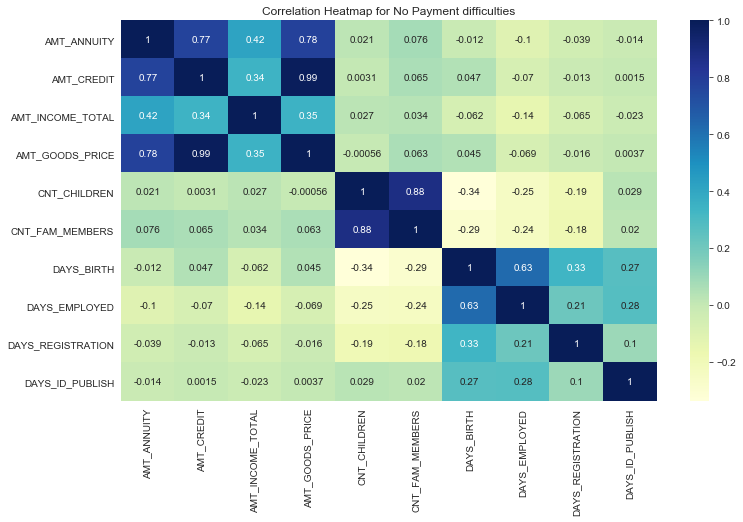

In [264]:
plt.figure(figsize=[12,7])
sns.heatmap(data=target0_corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap for No Payment difficulties')
plt.show()


#### Inferences for Target 0:
We can see a positive correlation for the following variables in the descending order :
1. AMT_CREDIT AND AMT_GOODS_PRICE - Highest correlated
2. CNT_CHILDREN AND CNT_FAM_MEMBERS
3. AMT_GOODS_PRICE AND AMT_ANNUITY
4. AMT_CREDIT AND AMT_ANNUITY
5. DAYS_EMPLOYED AND DAYS_BIRTH

We can see a negative correlation for the following variables in the descending order :
1. DAYS_BIRTH AND AMT_ANNUITY
2. DAYS_BIRTH AND AMT_INCOME_TOTAL
3. DAYS_EMPLOYED AND AMT_GOODS_PRICE

In [157]:
# Finding the correlation matrix for numeric columns for Target=1
target1_corr = df_target1[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN','CNT_FAM_MEMBERS',
           'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(method='pearson')
target1_corr

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
AMT_ANNUITY,1.000000,0.752195,0.046421,0.752295,0.031257,0.075711,0.014028,-0.081207,-0.034279,0.016767
AMT_CREDIT,0.752195,1.000000,0.038131,0.982783,-0.001675,0.051224,0.135070,0.001930,0.025854,0.052329
AMT_INCOME_TOTAL,0.046421,0.038131,1.000000,0.037591,0.004796,0.006654,-0.003154,-0.014977,-0.000158,0.004215
AMT_GOODS_PRICE,0.752295,0.982783,0.037591,1.000000,-0.008111,0.047367,0.135532,0.006648,0.025661,0.056061
CNT_CHILDREN,0.031257,-0.001675,0.004796,-0.008111,1.000000,0.885484,-0.259222,-0.192864,-0.149154,0.032299
CNT_FAM_MEMBERS,0.075711,0.051224,0.006654,0.047367,0.885484,1.000000,-0.203403,-0.186515,-0.145828,0.031785
DAYS_BIRTH,0.014028,0.135070,-0.003154,0.135532,-0.259222,-0.203403,1.000000,0.582441,0.289116,0.252256
DAYS_EMPLOYED,-0.081207,0.001930,-0.014977,0.006648,-0.192864,-0.186515,0.582441,1.000000,0.192455,0.229090
DAYS_REGISTRATION,-0.034279,0.025854,-0.000158,0.025661,-0.149154,-0.145828,0.289116,0.192455,1.000000,0.096833
DAYS_ID_PUBLISH,0.016767,0.052329,0.004215,0.056061,0.032299,0.031785,0.252256,0.229090,0.096833,1.000000


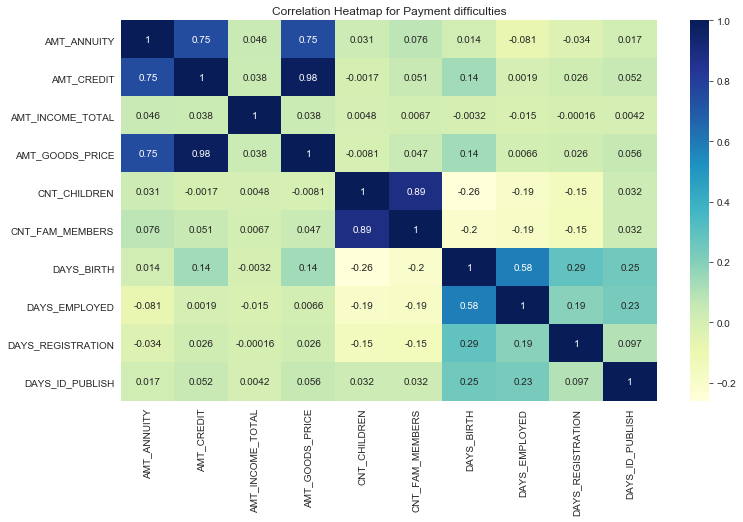

In [265]:
plt.figure(figsize=[12,7])
sns.heatmap(data=target1_corr, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap for Payment difficulties')
plt.show()

#### Inferences for Target 1:
We can see a positive correlation for the following variables in the descending order :
1. AMT_CREDIT AND AMT_GOODS_PRICE - Highest correlated
2. CNT_CHILDREN AND CNT_FAM_MEMBERS
3. AMT_GOODS_PRICE AND AMT_ANNUITY

We can see a negative correlation for the following variables in the descending order :
1. DAYS_BIRTH AND AMT_INCOME_TOTAL
2. DAYS_EMPLOYED AND AMT_GOODS_PRICE

## Reading data set for the previous application

In [63]:
#Reading the data set
df_prev_app=pd.read_csv(r'C:\Users\swballa\Documents\Personal\Data_Analytics\Credit_EDA_Case_Study\Credit EDA Case Study\previous_application.csv')

In [64]:
#Checking the data
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#Checking the columns
df_prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [66]:
# Checking the datatypes and info
df_prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [67]:
#checking the size of dataframe
df_prev_app.shape

(1670214, 37)

### Data Cleaning for previous application

In [68]:
# checking columns with missing values
df_prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [323]:
# checking the percentage of null values
round(df_prev_app.isnull().sum()/len(df_prev_app),2)*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_DOWN_PAYMENT               0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [70]:
# dropping unnecessary columns

df_prev_app.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION',
'NFLAG_INSURED_ON_APPROVAL','CNT_PAYMENT','NAME_TYPE_SUITE','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED',
'RATE_DOWN_PAYMENT','AMT_GOODS_PRICE'],axis=1,inplace=True)

In [71]:
# Checking whether columns are dropped 
round(df_prev_app.isnull().sum()/len(df_prev_app),2)*100

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_ANNUITY                    22.0
AMT_APPLICATION                 0.0
AMT_CREDIT                      0.0
AMT_DOWN_PAYMENT               54.0
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
dtype: float64

### Handling Missing values for previous application

In [72]:
len(df_prev_app[(df_prev_app.AMT_APPLICATION==0.0) & (df_prev_app.AMT_ANNUITY.isnull())]) 
# these many columns are null for AMT_ANNUITY which have AMT_APPLICATION as 0.0 value
# so replacing these null values for AMT_ANNUITY with 0.0

335146

In [73]:
# Replacing missing values for AMT_ANNUITY with 0.0 
df_prev_app['AMT_ANNUITY']=df_prev_app.AMT_ANNUITY.fillna(0.0)

In [74]:
# Finding the mode of AMT_DOWN_PAYMENT to replace the missing values

df_prev_app.AMT_DOWN_PAYMENT.mode()[0]

0.0

In [75]:
# Filling the missing values with mode
df_prev_app['AMT_DOWN_PAYMENT']=df_prev_app.AMT_DOWN_PAYMENT.fillna(df_prev_app.AMT_DOWN_PAYMENT.mode()[0])

In [76]:
df_prev_app.AMT_DOWN_PAYMENT.isnull().sum()

0

In [77]:
df_prev_app.AMT_ANNUITY.isnull().sum()

0

### Finding outliers for previous application dataset

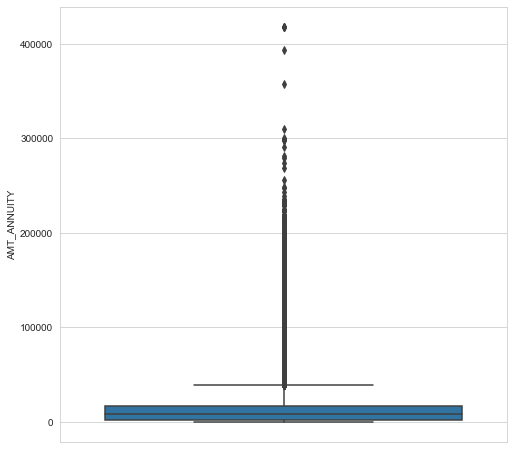

In [78]:
# Univariate analysis for AMT_ANNUITY column
sns.set_style("whitegrid")
plt.figure(figsize=[8,8])
sns.boxplot(data=df_prev_app,x='AMT_ANNUITY',orient='v')
plt.show()

#### We observe that there are many outliers for AMT_ANNUITY column in previous application above 50000.

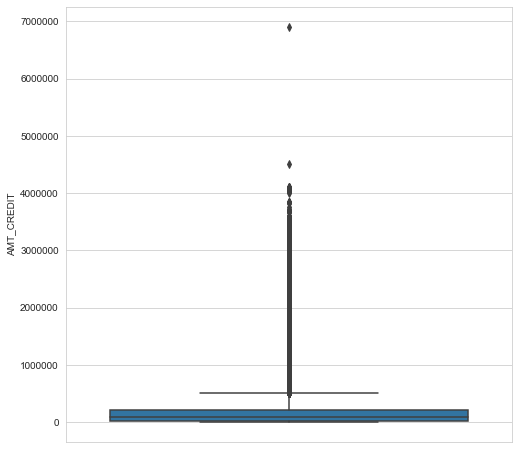

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize=[8,8])
sns.boxplot(data=df_prev_app,x='AMT_CREDIT',orient='v')
plt.show()

#### We observe that there are many outliers for AMT_CREDIT column in previous application as well above 500000.

### Univariate and Bivariate analysis for previous application dataset

In [80]:
# Checking the counts of different contract status
df_prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

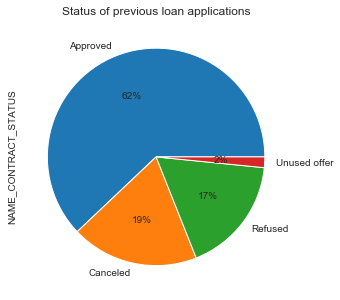

In [290]:
plt.figure(figsize=[8,5])
df_prev_app.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Status of previous loan applications')
plt.show()

#Inferences :
1. We can conclude that the majority of applications were approved.
2. The count of applications which were canceled or refused are approximately same.
3. Only 2% of loan applications were not accepted by the applicants.

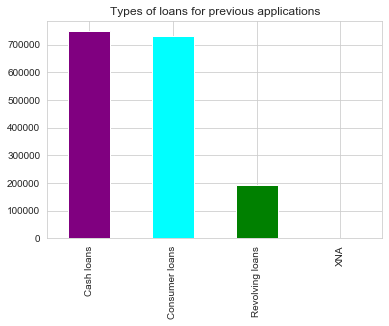

In [292]:
df_prev_app['NAME_CONTRACT_TYPE'].value_counts().plot.bar(color=['purple','cyan','green','red'])
plt.title('Types of loans for previous applications')
plt.show()

#Inferences :
1. Cash loans has the highest count of previous applications followed by consumer loans.
2. Revolving loans has lowest count of previous applications.

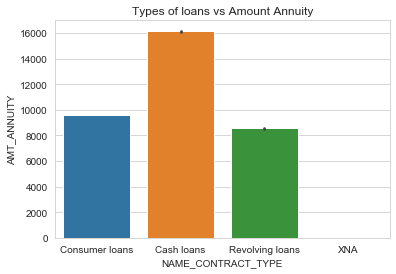

In [326]:
sns.barplot(data=df_prev_app, x = 'NAME_CONTRACT_TYPE', y='AMT_ANNUITY')
plt.title('Types of loans vs Amount Annuity')
plt.show()

#Inferences:
1. Cash loans has the highest amount of annuity.
2. Revolving loans has the lowest amount of annuity.

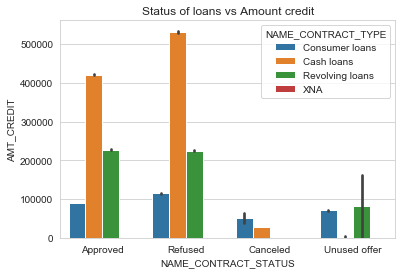

In [328]:
sns.barplot(data=df_prev_app, x = 'NAME_CONTRACT_STATUS', y='AMT_CREDIT', hue='NAME_CONTRACT_TYPE')
plt.title('Status of loans vs Amount credit')
plt.show()

#### Status of loans vs Amount credit :
1. Approved loans are maximum for Cash loans contract type and minimum for consumer loans.
2. Revolving loans have the same threshold for approved and refused status.
3. For cash loans contract type, the refused loans threshold is above 420000 credit amount as compared to Approved loans.
4. Cancelled loans are usually below 50000 credit amount threshold. 
5. For Unused offer, Revolving and Consumer loans are the 2 loan type categories.

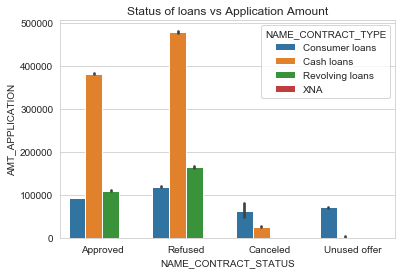

In [236]:
sns.barplot(data=df_prev_app, x = 'NAME_CONTRACT_STATUS', y='AMT_APPLICATION', hue='NAME_CONTRACT_TYPE')
plt.title('Status of loans vs Application Amount')
plt.show()

#### Status of loans vs Amount Application :
1. Approved and Refused loans are maximum for Cash loans contract type and minimum for consumer loans.
2. Cancelled loans are usually for consumer loans. 
3. For all contract types, Refused loans were more than approved loans.

In [329]:
# checking counts for payment type
df_prev_app.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

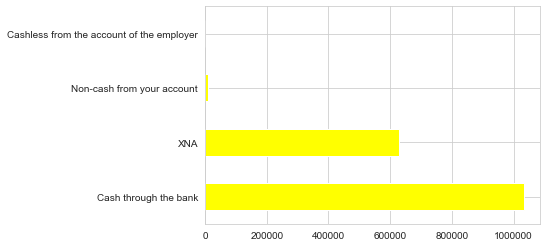

In [254]:
df_prev_app.NAME_PAYMENT_TYPE.value_counts().plot.barh(color='yellow')
plt.show()

#Inferences:
1. Cash through the bank is the most common type of payment method for loan applications.

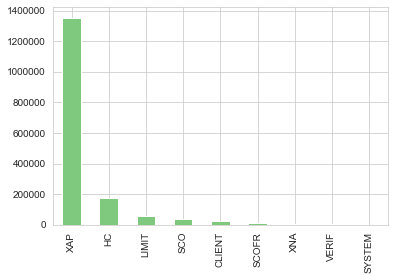

In [261]:
df_prev_app.CODE_REJECT_REASON.value_counts().plot.bar(colormap='Accent')
plt.show()

#Inferences:
1. We can infer from the above graph that XAP is the top most reject reason for the applications. 
2. The count for other reject reasons is very less and can be excluded for the analysis.

### Merging the two dataframes ( current application with previous application ) :

In [330]:
#Merging application dataset with previous application dataset
df_merged=pd.merge(left = df_curr_app, right = df_prev_app, how='inner', on = 'SK_ID_CURR', suffixes='_x')
df_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
  

In [331]:
df_merged.shape

(1413701, 75)

In [348]:
# creating a pivot table 
plot1 = pd.pivot_table(df_merged, values='TARGET', index=['NAME_CLIENT_TYPE'], columns=['NAME_CONTRACT_STATUS'], aggfunc = np.mean)
plot1

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072144,0.091767,0.120596,0.083338
XNA,0.071264,0.101377,0.135714,0.103448


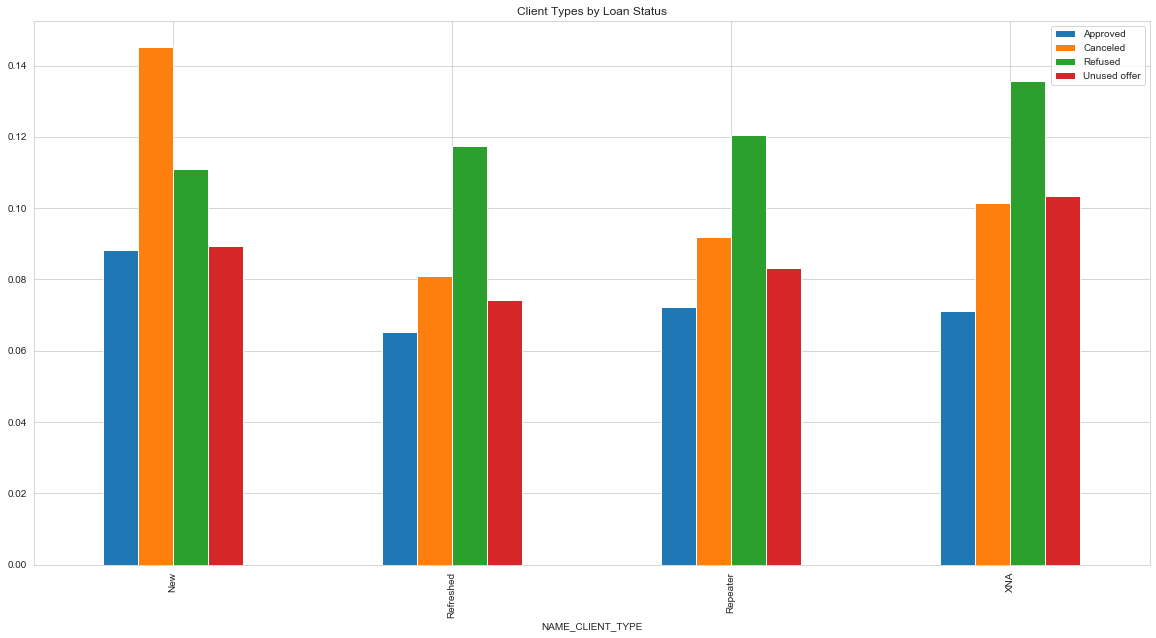

In [349]:
plot1.plot(kind='bar', figsize=[20,10]).legend()
plt.title('Client Types by Loan Status')
plt.show()

#### Inferences :
1. Most of the loan applications for new clients are cancelled.
2. For repeater clients, most of the loan applications are refused.
3. Across all the different client types, the 'NEW' client type has the maximum approved loan applications.
4. Across all the different client types, the 'XNA' client type has the maximum refused loan applications followed by 'REPEATER' client type.

In [350]:
# creating a pivot table 
plot2 = pd.pivot_table(df_merged, values='TARGET', index=['OCCUPATION_TYPE'], columns=['NAME_CONTRACT_STATUS'], aggfunc = np.mean)
plot2

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
OCCUPATION_TYPE,,,,
Accountants,0.049152,0.058556,0.088699,0.058589
Cleaning staff,0.081811,0.100466,0.119691,0.097179
Cooking staff,0.094226,0.119946,0.153740,0.092391
Core staff,0.059352,0.074357,0.095826,0.072053
Drivers,0.106539,0.126236,0.164030,0.101750
HR staff,0.060541,0.076923,0.106796,0.142857
High skill tech staff,0.060436,0.083579,0.092341,0.071504
IT staff,0.062718,0.063910,0.069767,0.322581
Laborers,0.074706,0.087742,0.118430,0.082921


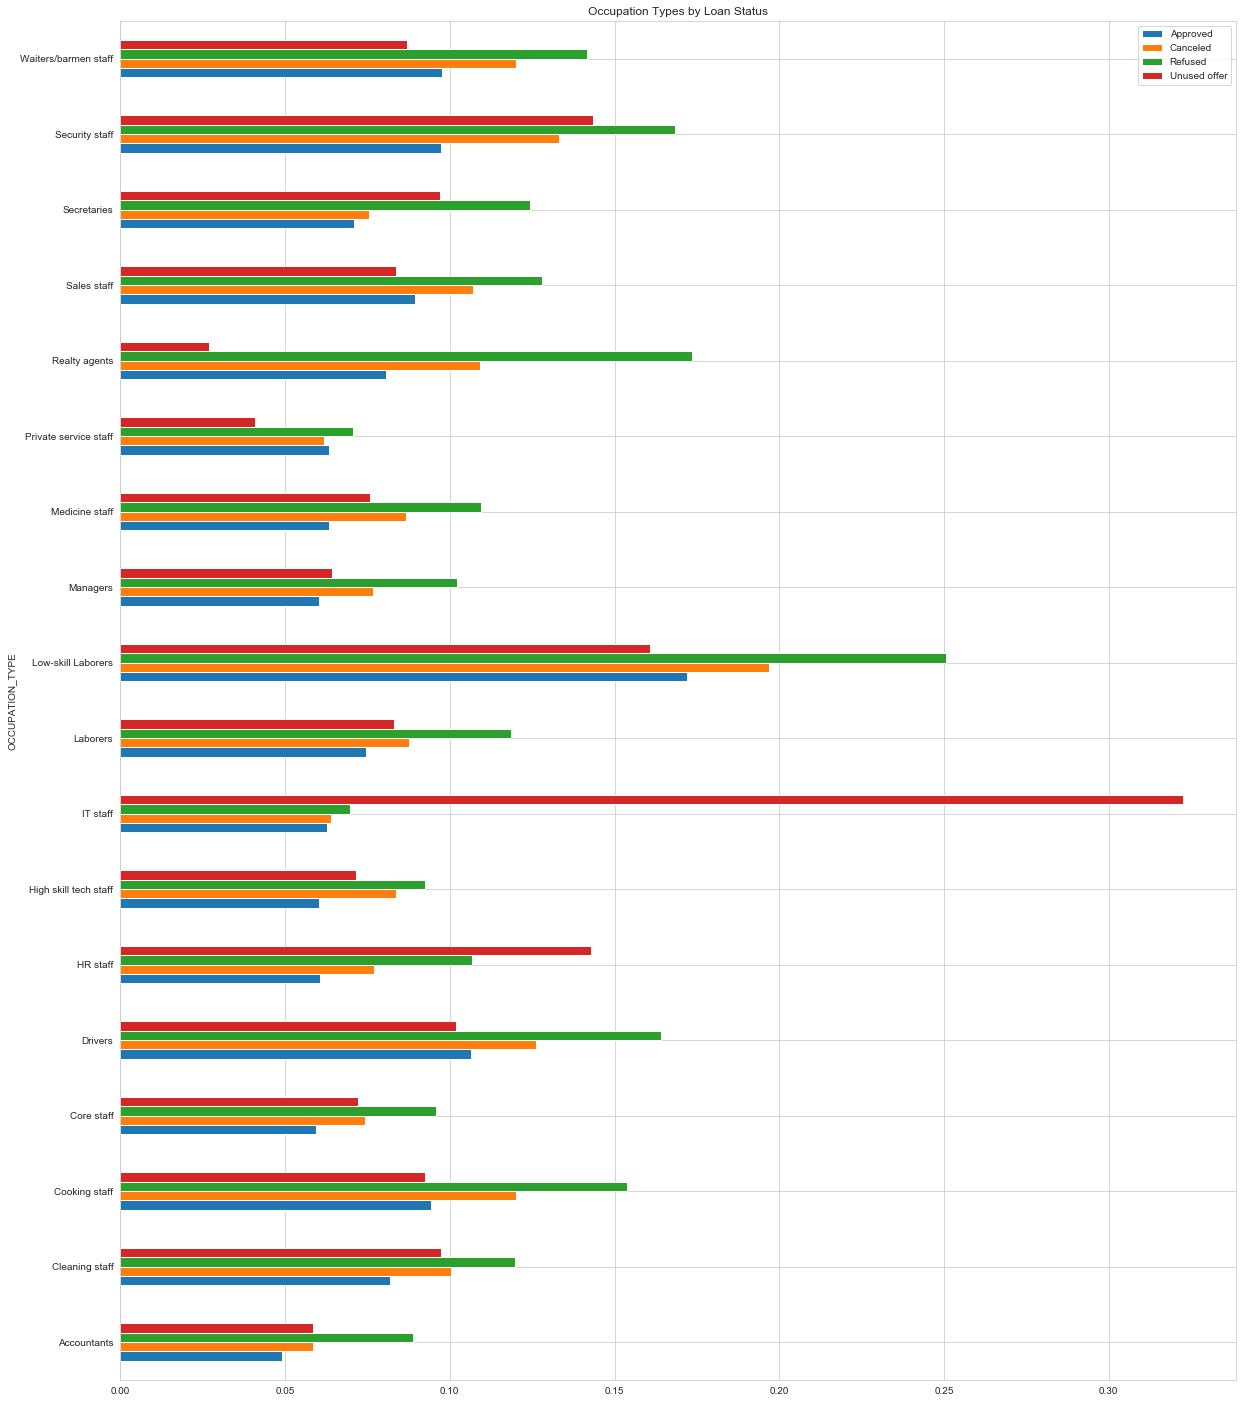

In [358]:
plot2.plot(kind='barh', figsize=[20,25]).legend()
plt.title('Occupation Types by Loan Status')
plt.show()

#### Inferences :
1. Low-skill laborers, Laborers and Drivers have the highest amount of applications being refused as compared to being approved.
2. IT staff has the highest amount of applications being unused offer status but it has the lowest refusal rate as well.
3. IT staff, Accountants, Medicine Staff, Private Service Staff have comparatively balanced refusal and approval rates.

In [367]:
# creating a pivot table 
plot3 = pd.pivot_table(df_merged, values='TARGET', index=['AMT_INCOME_QRANGE'], columns=['NAME_CONTRACT_STATUS'], aggfunc = np.mean)
plot3

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
AMT_INCOME_QRANGE,,,,
VERY LOW,0.073452,0.092552,0.124547,0.079072
LOW,0.078473,0.094064,0.125084,0.085353
MEDIUM,0.082361,0.100728,0.132873,0.098477
HIGH,0.077676,0.093346,0.118933,0.078006
VERY HIGH,0.066601,0.078856,0.101788,0.076300


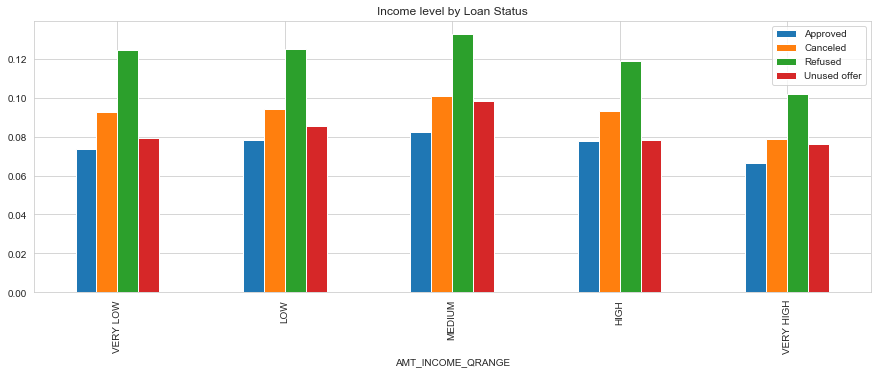

In [368]:
plot3.plot(kind='bar', figsize=[15,5]).legend()
plt.title('Income level by Loan Status')
plt.show()

### Inferences :
1. Medium income range has the highest amount of applicants being refused.
2. The Approved applications are approx. similar for all income groups.

In [370]:
# creating a pivot table 
plot4 = pd.pivot_table(df_merged, values='TARGET', index=['NAME_EDUCATION_TYPE'], columns=['NAME_CONTRACT_STATUS'], aggfunc = np.mean)
plot4

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_EDUCATION_TYPE,,,,
Academic degree,0.014354,0.000000,0.010989,0.500000
Higher education,0.052282,0.064197,0.085401,0.066687
Incomplete higher,0.077649,0.101554,0.117082,0.099695
Lower secondary,0.095434,0.125847,0.139684,0.115152
Secondary / secondary special,0.082583,0.099024,0.130231,0.087992


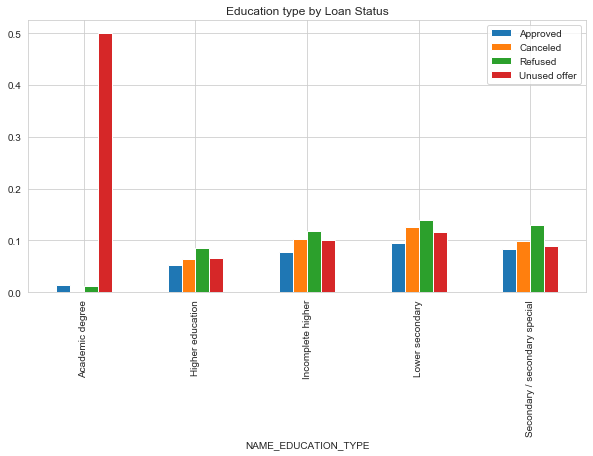

In [372]:
plot4.plot(kind='bar', figsize=[10,5]).legend()
plt.title('Education type by Loan Status')
plt.show()

### Inferences :
1. The lower secondary education has the most number of applications being approved.
2. The academic degree has the highest number of applications unused.
3. The approved applications are less in number for Higher education type.

In [373]:
# creating a pivot table 
plot5 = pd.pivot_table(df_merged, values='TARGET', index=['NAME_INCOME_TYPE'], columns=['NAME_CONTRACT_STATUS'], aggfunc = np.mean)
plot5

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_INCOME_TYPE,,,,
Commercial associate,0.071559,0.085205,0.110931,0.066838
Maternity leave,1.000000,1.000000,1.000000,1.000000
Pensioner,0.052397,0.060807,0.078398,0.053015
State servant,0.056726,0.070349,0.086427,0.070487
Student,0.000000,0.000000,0.000000,NaN
Unemployed,0.455882,0.687500,0.657895,0.000000
Working,0.089059,0.111520,0.142226,0.093301


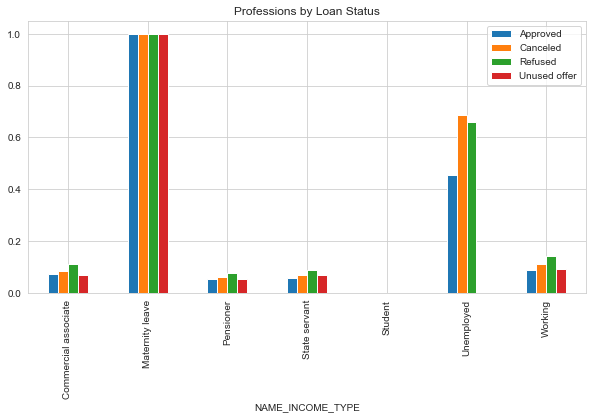

In [377]:
plot5.plot(kind='bar', figsize=[10,5]).legend()
plt.title('Professions by Loan Status')
plt.show()

### Inferences :
1. Maternity leave group has the same count for all loan statuses.
2. Unemployed group has the highest cancellations, refusals and approvals after Maternity leave group.
3. All other groups except student have approx. similar loan statuses.

In [379]:
# Checking the counts of Income type
df_merged.NAME_INCOME_TYPE.value_counts()

Working                 724089
Commercial associate    321481
Pensioner               273544
State servant            94424
Unemployed                 123
Student                     24
Maternity leave             16
Name: NAME_INCOME_TYPE, dtype: int64

## Conclusion :

1. Banks should focus more on new applicants those who belong to IT staff, Accountants, Medicine Staff or Private Service Staff group since the loan statuses(approved, refused, cancelled) are stable for such groups.
2. Banks should not focus more on Low-skill laborers, Laborers and Drivers occupation type as they have a high refusal rate.
3. Income level do not affect the loan application statuses and hence bank can choose to focus on other attributes.
4. Secondary education and lower education is a stable education group to focus for approval of loans as the number of applicants for these groups is higher.
5. Banks should target Working, Commercial associate and State servants income type as number of applicants as well as the stats are stable.